<a href="https://colab.research.google.com/github/FabioNicotra/fabionicotra.github.io/blob/develop/02/temp_name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile price classification
This project was originally assigned during the course Data Structures in Python held by Politecnico di Torino in cooperation with Reply IT.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import csv
import seaborn as sn

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

seed=123456
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

## 1. Data Loading

Load the dataset to csv

In [ ]:
path=r'a1_dataset.csv'
df=pd.read_csv(path)

## 2. Explorative analysis

#### Visualize the first 5 entries of the dataset

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,N,2.2,NaN,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,Y,1
1,1021,Y,0.5,1.0,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,N,2
2,563,Y,0.5,1.0,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,N,2
3,615,Y,2.5,NaN,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,N,2
4,1821,Y,1.2,NaN,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,N,1


#### Check for null values

In [ ]:
print(f'{df.isna().sum()} =')

battery_power      0
blue               0
clock_speed        0
dual_sim         981
fc                 0
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          0
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64 =


#### Show info about the dataframe: columns, data types, non-null values and memory footprint
Use pandas.DataFrame.info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       1019 non-null   float64
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Generate descriptive statistics
Use pandas.DataFrame.describe

In [ ]:
df.describe()

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,price_range
count,2000.000000,2000.000000,1019.0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,1.0,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,1.500000
std,439.418206,0.816004,0.0,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,1.118314
min,501.000000,0.500000,1.0,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.700000,1.0,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.750000
50%,1226.000000,1.500000,1.0,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.500000
75%,1615.250000,2.200000,1.0,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,2.250000
max,1998.000000,3.000000,1.0,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,3.000000


#### Show box plots of features distribution
Use pandas.DataFrame.plot

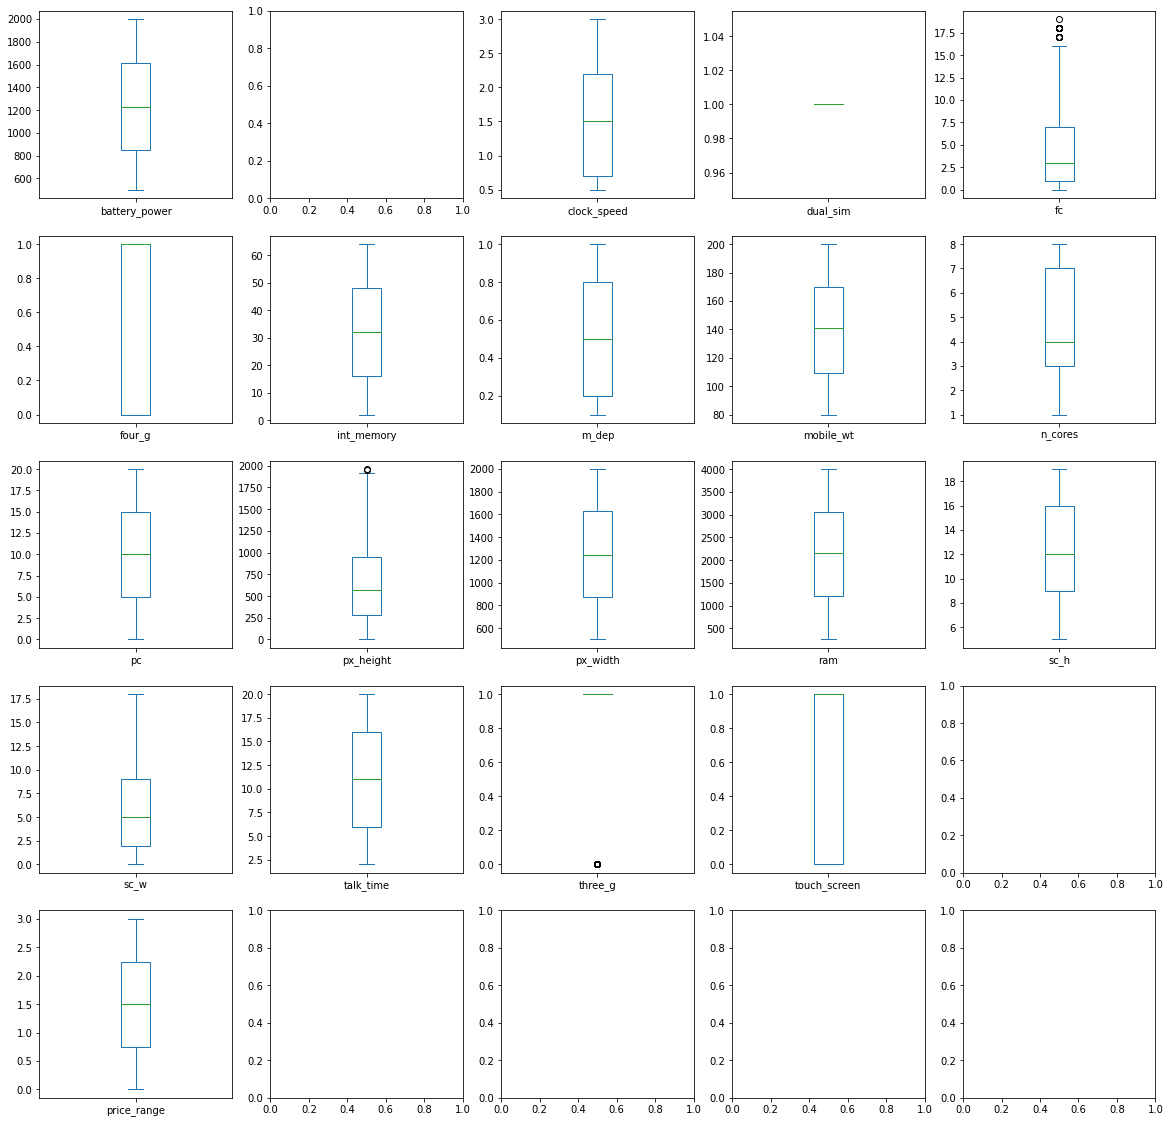

In [ ]:
from pandas.api.types import is_numeric_dtype
ncol = len(df.columns)
fig, axs = plt.subplots(5, 5,figsize=(20, 20))
for col,i in zip(df.columns,np.arange(0,ncol)):
    if is_numeric_dtype(df.dtypes[col]):
        plt.subplot(5,5,i+1)
        df[col].plot.box();

#### Check whether the dataset is balanced

In [ ]:
df.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

## 3. Data manipulation

#### Fill null values of 'dual_sim' with 0 and check it

In [ ]:
df.dual_sim.fillna(0,inplace=True)
df.dual_sim.hasnans

False

#### Performs the mapping {Y : 1 ; N : 0} to columns 'blue' and 'wifi'
Use pandas.DataFrame.apply()

In [ ]:
df['blue'] = df['blue'].apply(lambda x : 1 if(x=="Y") else 0)
df['wifi'] = df['wifi'].apply(lambda x : 1 if(x=="Y") else 0)

## 4. Correlation
Calculates the correlation of features and represents it via a heatmap.
Use pandas.DataFrame.corr

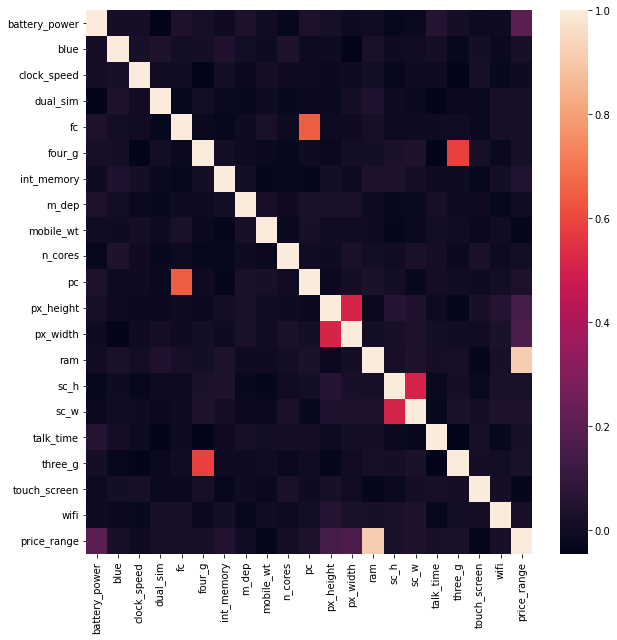

<Figure size 216x216 with 0 Axes>

In [ ]:
corr_map = df.corr(method='pearson')
plt.figure(figsize=(10, 10));
sn.heatmap(corr_map);
plt.figure(figsize=(3, 3));

## 5. Statistical analysis of features through graphic libraries

#### Number of devices for 'price_range'

Text(0, 0.5, 'number of devices')

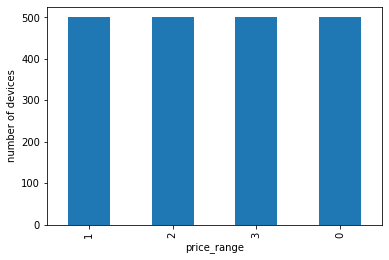

In [ ]:
df.price_range.value_counts().plot.bar();
plt.xlabel('price_range')
plt.ylabel('number of devices')

#### Column values distribution by target (boxplot)

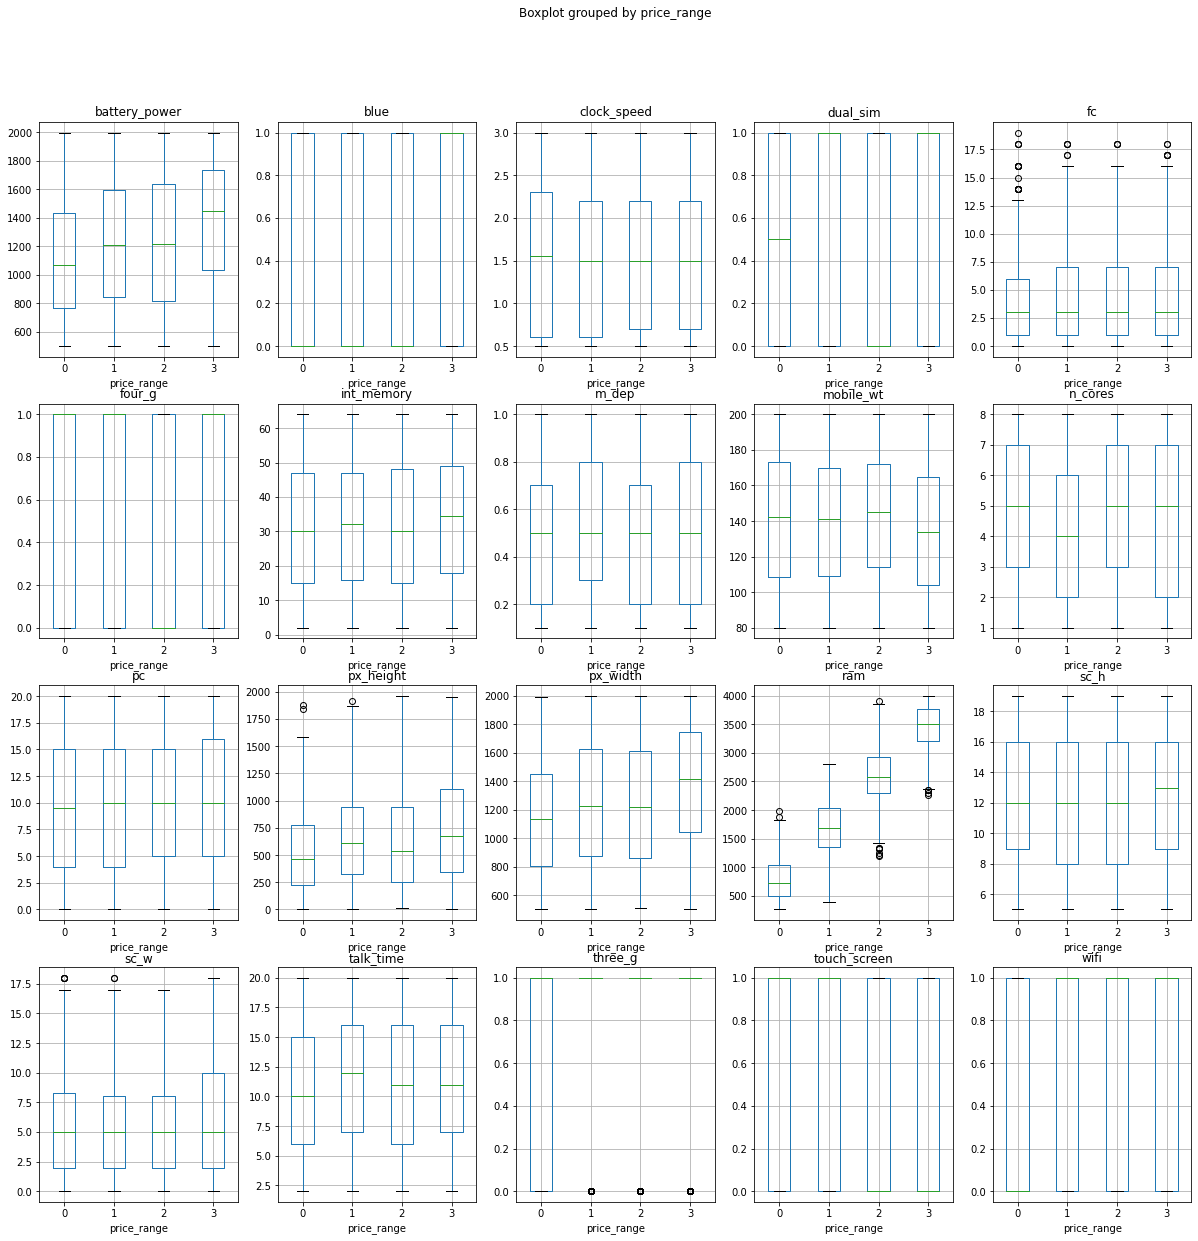

In [ ]:
fig, axs = plt.subplots(4, 5,figsize=(20, 20))
ncol = len(df.columns)
for col,i in zip(df.columns,np.arange(0,ncol)):
    if col != 'price_range':
        sp = plt.subplot(4,5,i+1)
        df.boxplot(column=col,by='price_range',ax=sp);

#### Graphically represents the relationship between 'px_width' and 'px_height'

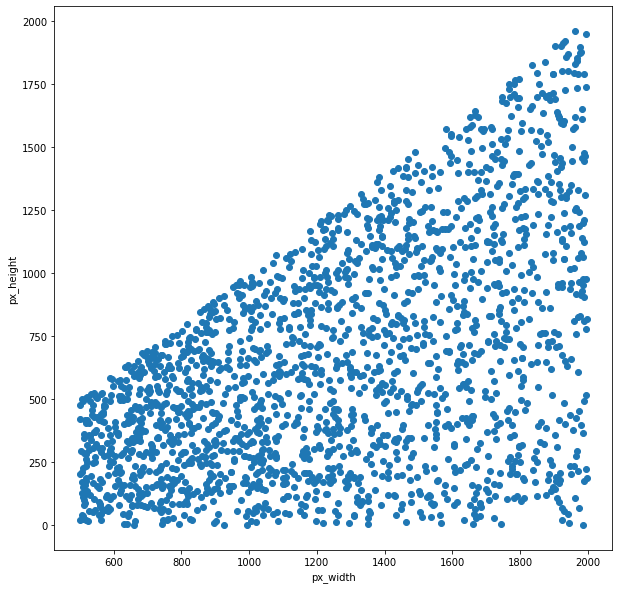

In [ ]:
plt.figure(figsize=(10, 10));
plt.scatter(df.px_width,df.px_height)
plt.xlabel('px_width');
plt.ylabel('px_height');

#### Graphically represents the relationship between 'pc' and 'fc'

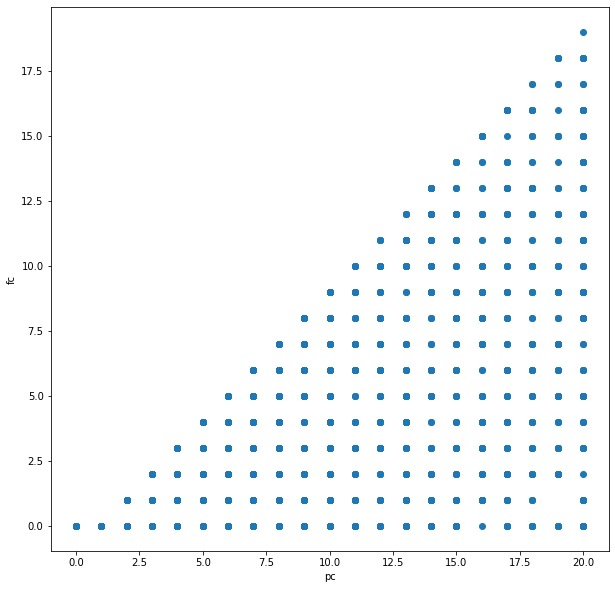

In [ ]:
plt.figure(figsize=(10, 10));
plt.scatter(df.pc,df.fc)
plt.xlabel('pc');
plt.ylabel('fc');

#### Display the number of devices for various values of 'n_cores' (bar chart)

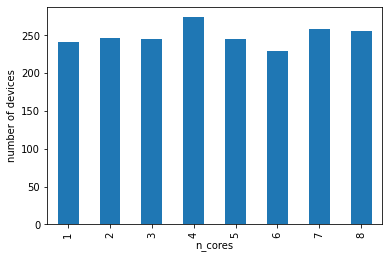

In [ ]:
df.n_cores.value_counts().sort_index().plot.bar();
plt.xlabel('n_cores');
plt.ylabel('number of devices');

#### Calculate the number of devices based on the values of 'four_g' and 'three_g' and represents the numeric (pie chart)
Use pandas.DataFrame.groupby

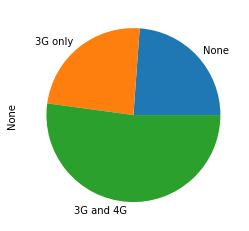

In [ ]:
labels = ['None', '3G only', '3G and 4G']
df.groupby(['three_g', 'four_g']).size().plot.pie(labels=labels);

## 6. Creation of new features

#### Add column 'sc_dim' = 'sc_w' * 'sc_h'

In [ ]:
df['sc_dim'] = df['sc_w']*df['sc_h']

#### Add column ‘px_dim’ = 'px_width' * 'px_height'

In [ ]:
df['px_dim'] = df['px_width']*df['px_height']

#### Add column ‘3g_4g’

In [ ]:
# Map 3g and 4g in a single variable, assuming the following values:
# 0-> 3G:n 4G:n
# 1-> 3G:s 4G:n
# 2-> 3G:n 4G:s
# 3-> 3G:s 4G:s

df['3g_4g'] = df['three_g']+2*df['four_g']

## 7. Dropping features

#### Drop the columns: ‘sc_w’, ‘sc_h’, 'px_width', 'px_height', ‘four_g’, and ‘three_g’

In [ ]:
df = df.drop(columns=['sc_w','sc_h','px_width','px_height','four_g','three_g'])
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,price_range,sc_dim,px_dim,3g_4g
0,842,0,2.2,0.0,1,7,0.6,188,2,2,2549,19,0,1,1,63,15120,0
1,1021,1,0.5,1.0,0,53,0.7,136,3,6,2631,7,1,0,2,51,1799140,3
2,563,1,0.5,1.0,2,41,0.9,145,5,6,2603,9,1,0,2,22,2167308,3
3,615,1,2.5,0.0,0,10,0.8,131,6,9,2769,11,0,0,2,128,2171776,1
4,1821,1,1.2,0.0,13,44,0.6,141,2,14,1411,15,1,0,1,16,1464096,3


In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,price_range,sc_dim,px_dim,3g_4g
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,2124.213000,11.011000,0.503000,0.507000,1.500000,80.257000,9.052601e+05,1.804500
std,439.418206,0.5001,0.816004,0.500035,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,1084.732044,5.463955,0.500116,0.500076,1.118314,76.824156,8.297625e+05,1.295422
min,501.000000,0.0000,0.500000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,256.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,1207.500000,6.000000,0.000000,0.000000,0.750000,19.000000,2.632005e+05,1.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,2146.500000,11.000000,1.000000,1.000000,1.500000,55.000000,6.013590e+05,3.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,3064.500000,16.000000,1.000000,1.000000,2.250000,121.500000,1.359027e+06,3.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,3998.000000,20.000000,1.000000,1.000000,3.000000,342.000000,3.886306e+06,3.000000


## 8. Analyse correlation on the modified dataset

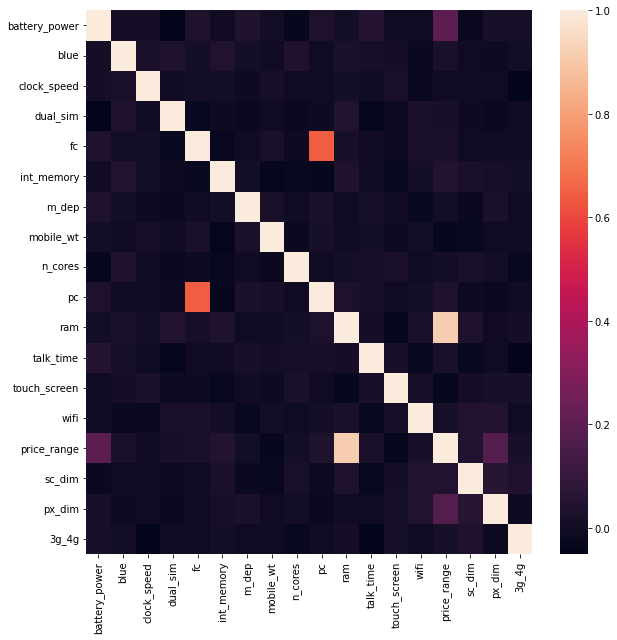

<Figure size 216x216 with 0 Axes>

In [ ]:
corr_map = df.corr(method='pearson')
plt.figure(figsize=(10, 10));
sn.heatmap(corr_map);
plt.figure(figsize=(3, 3));

## 9. Split target variable y (‘price_range’) from the other features (x)
Select the label 'price_range' as y and the remaining ones as x

In [ ]:
y = df.price_range
x = df.drop('price_range', axis=1)

## 10. Normalization

#### Normalize the dataset
from sklearn.preprocessing import StandardScaler

In [ ]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,sc_dim,px_dim,3g_4g
0,842,0,2.2,0.0,1,7,0.6,188,2,2,2549,19,0,1,63,15120,0
1,1021,1,0.5,1.0,0,53,0.7,136,3,6,2631,7,1,0,51,1799140,3
2,563,1,0.5,1.0,2,41,0.9,145,5,6,2603,9,1,0,22,2167308,3
3,615,1,2.5,0.0,0,10,0.8,131,6,9,2769,11,0,0,128,2171776,1
4,1821,1,1.2,0.0,13,44,0.6,141,2,14,1411,15,1,0,16,1464096,3


In [ ]:
x_scaled = StandardScaler().fit_transform(x.values)

In [ ]:
X = pd.DataFrame(x_scaled, columns=x.columns)
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,sc_dim,px_dim,3g_4g
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.380644,0.340740,1.349249,-1.101971,-1.305750,0.391703,1.462493,-1.006018,0.986097,-0.224686,-1.073033,-1.393330
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.467317,-0.734267,0.994018,-1.014099,-0.380926,1.077541,0.923096
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.493546,1.381165,0.134244,0.209639,-0.645989,0.441498,-0.368140,0.994018,-1.014099,-0.758506,1.521355,0.923096
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.215274,1.034357,-0.261339,0.646842,-0.151168,0.594569,-0.002014,-1.006018,-1.014099,0.621614,1.526741,-0.621188
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.658915,0.340740,0.021220,-1.101971,0.673534,-0.657666,0.730240,0.994018,-1.014099,-0.836626,0.673657,0.923096


#### Visualize using histograms all features distribution before and after normalization
Use pandas.DataFrame.hist

<Figure size 1440x1440 with 0 Axes>

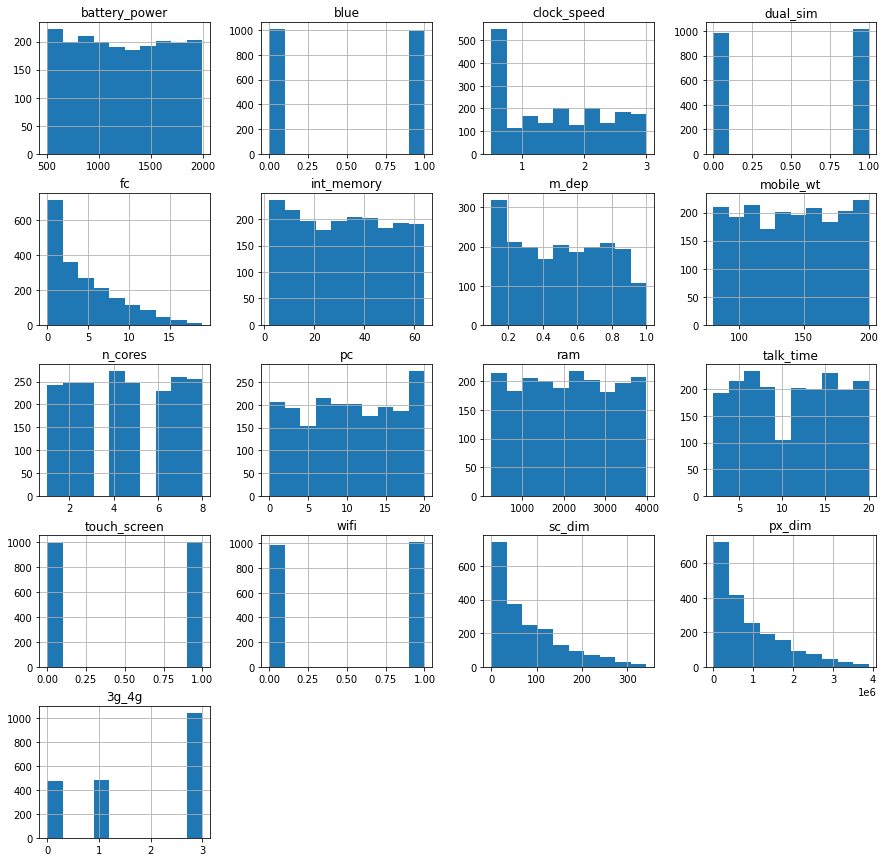

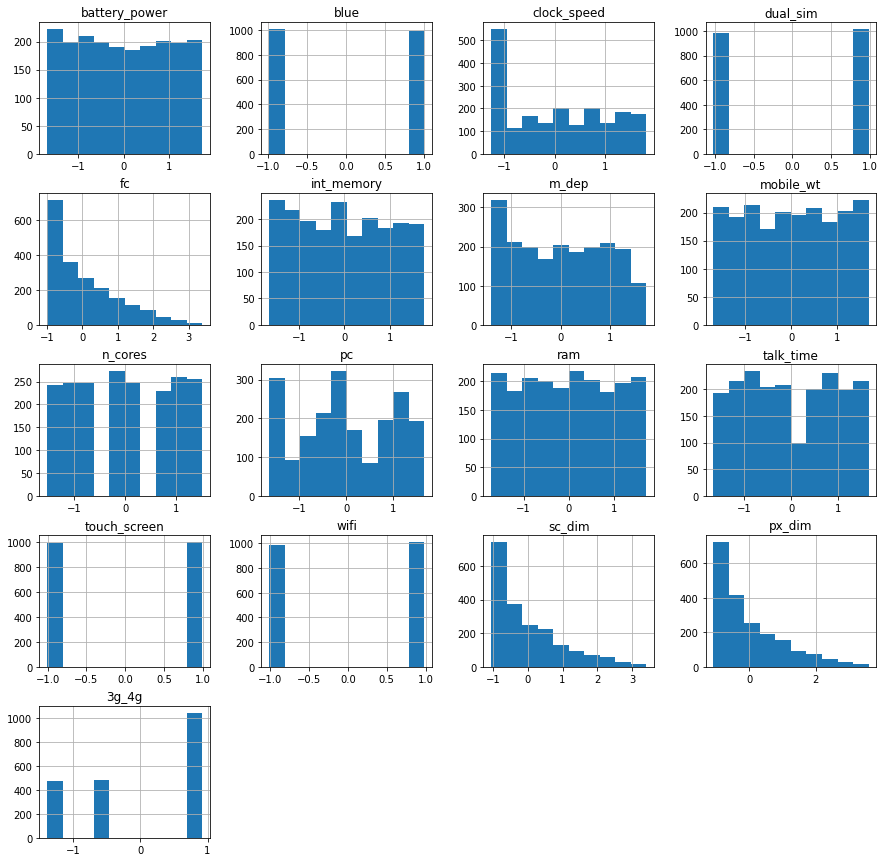

In [ ]:
plt.figure(figsize=(20, 20));
x.hist(figsize=(15,15));

X.hist(figsize=(15,15));


## 11. Split X (normalized) e y in train and test set with a 70:30 ratio

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

In [ ]:
X_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,sc_dim,px_dim,3g_4g
1417,1.703773,1.010051,0.463042,-1.019184,-0.992890,0.989655,0.687548,-0.600410,1.521249,1.333295,-1.168519,-0.917331,0.994018,-1.014099,-0.419986,1.136441,-0.621188
811,-0.982268,-0.990050,-1.253064,-1.019184,1.080671,-1.325520,-0.699686,0.501571,0.209639,1.663176,-0.774775,-1.649584,0.994018,0.986097,1.832473,-0.530840,-1.393330
1120,-0.501967,-0.990050,0.830779,-1.019184,0.850275,-0.884535,0.340740,0.360291,1.521249,0.013773,0.939441,1.645557,0.994018,-1.014099,1.611133,0.622353,-1.393330
916,-0.961781,1.010051,-1.253064,-1.019184,-0.071307,-0.994781,1.381165,1.631808,-0.664768,0.508594,-1.020058,0.730240,-1.006018,-1.014099,1.168453,-0.991035,-0.621188
330,-1.312332,-0.990050,-1.253064,-1.019184,0.159088,-0.664042,1.034357,-0.063548,-1.539175,0.013773,0.000726,0.730240,0.994018,0.986097,2.275153,0.385706,-1.393330


## 12. Classification
Using sklearn implement the following classification models

### Decision Tree

In [ ]:
param_grid={"max_depth":[3,4,5],"criterion":['gini','entropy']}
clf=DecisionTreeClassifier(random_state=seed)
gridsearch=GridSearchCV(clf,param_grid,scoring='accuracy',cv=5,n_jobs=-1,error_score=0.0)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [ ]:
dt = gridsearch.best_estimator_
fdt = dt.fit(X_train, y_train)

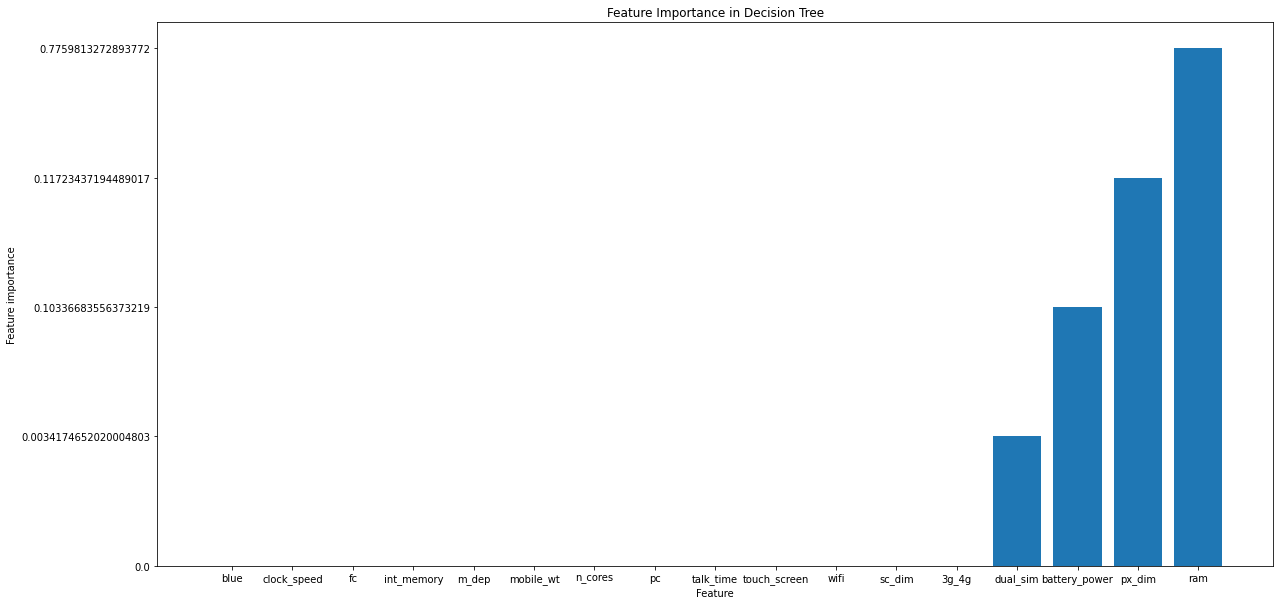

In [ ]:
fi=np.array(sorted(zip(X.columns, fdt.feature_importances_),key=lambda x: x[1], reverse=False))

fig=plt.figure(figsize=(20,10))
plt.bar(
    x=fi[:,0],
    height=fi[:,1],
    tick_label=fi[:,0]
)
plt.ylabel('Feature importance')
plt.xlabel('Feature')
plt.title('Feature Importance in Decision Tree')
plt.show()

In [ ]:
y_pred_dt = dt.predict(X_test)

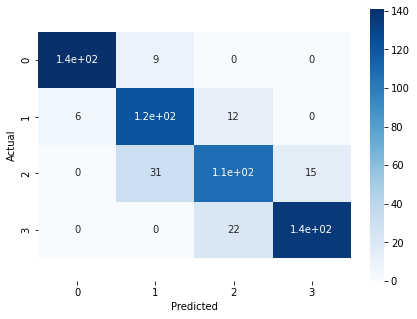

In [ ]:
confusion_matrix = pd.crosstab(y_test,y_pred_dt,rownames=['Actual'],colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,5))
sn.heatmap(confusion_matrix, annot=True, cmap='Blues')
a,b=plt.ylim()
a+=0.4
b-=0.4
plt.ylim(a,b)
plt.show()

### Logistic Regression

In [ ]:
param_grid={"penalty":['l1','l2'],"fit_intercept":[True, False],"multi_class":['ovr'],"max_iter":[10000]}
clf=LogisticRegression(random_state=seed)
gridsearch=GridSearchCV(clf,param_grid,scoring='accuracy',cv=5,n_jobs=-1,error_score=0.0)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

{'fit_intercept': True,
 'max_iter': 10000,
 'multi_class': 'ovr',
 'penalty': 'l2'}

In [ ]:
lg = gridsearch.best_estimator_
lg.fit(X_train,y_train)

LogisticRegression(max_iter=10000, multi_class='ovr', random_state=123456)

In [ ]:
y_pred_lg=lg.predict(X_test)

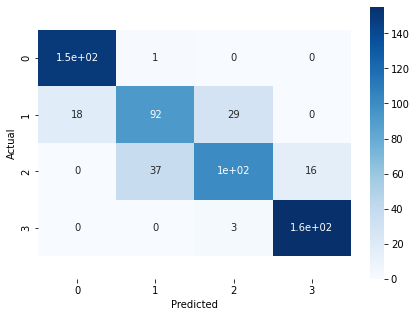

In [ ]:
confusion_matrix = pd.crosstab(y_test,y_pred_lg,rownames=['Actual'],colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,5))
sn.heatmap(confusion_matrix, annot=True, cmap='Blues')
a,b=plt.ylim()
a+=0.4
b-=0.4
plt.ylim(a,b)
plt.show()

### Support Vector Machines

In [ ]:
param_grid={"C":[0.3,0.5,1],"decision_function_shape":['ovo','ovr'],"kernel":['linear','poly','rbf']}
clf=SVC(random_state=seed)
gridsearch=GridSearchCV(clf,param_grid,scoring='accuracy',cv=5,n_jobs=-1,error_score=0.0)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

{'C': 1, 'decision_function_shape': 'ovo', 'kernel': 'linear'}

In [ ]:
svc = gridsearch.best_estimator_
svc.fit(X_train,y_train)

SVC(C=1, decision_function_shape='ovo', kernel='linear', random_state=123456)

In [ ]:
y_pred_svc=svc.predict(X_test)

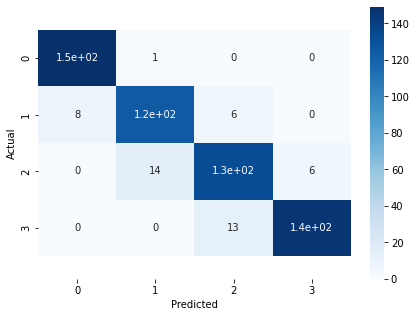

In [ ]:
confusion_matrix = pd.crosstab(y_test,y_pred_svc,rownames=['Actual'],colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,5))
sn.heatmap(confusion_matrix, annot=True, cmap='Blues')
a,b=plt.ylim()
a+=0.4
b-=0.4
plt.ylim(a,b)
plt.show()

## 13. Compare the end results by their accuracy

In [ ]:
conclusion = pd.DataFrame({'Models': ["Decision Tree", "Logistic Regression","Support Vector Classifier"],
                           'Accuracies':[accuracy_score(y_test,y_pred_dt),accuracy_score(y_test,y_pred_lg),accuracy_score(y_test,y_pred_svc)]})
conclusion

,Models,Accuracies
0,Decision Tree,0.841667
1,Logistic Regression,0.826667
2,Support Vector Classifier,0.920000


## (Optional)

## 14. LDA
Use LDA to achieve dimensionality reduction

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=None)

x_lda = lda.fit(x,y).transform(x)

In [ ]:
lda.explained_variance_ratio_

#### Linear Discriminant Analysis

## 15. Classification with feature extraction

### Decision Tree

### Logistic Regression

### Support Vector Machines

## 16. Compare the end results by their accuracy